- __Mixed Data__

in a single colmn both numerical and categorical data
- eg - In indian railways > G1,G2 g is categorical and 2 is numerical data
- 7,2,5,8,7,I,G,3,6,4,2

- Is k do colmn alg se banane padege

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan],
    'Class': ['A1', 'A2', 'A3', 'A4', 'A5'],
    'Ticket': ['A/5211', 'PC 17533', 'STON/02.1245', '113253', '468462'],
    'Number': [5, 3, 6, 4, 'A'],
    'Survived': [0, 1, 1, 1, 0]
})

df


,Cabin,Class,Ticket,Number,Survived
0,NaN,A1,A/5211,5,0
1,C85,A2,PC 17533,3,1
2,NaN,A3,STON/02.1245,6,1
3,C123,A4,113253,4,1
4,NaN,A5,468462,A,0


In [18]:
df
import numpy as np

In [15]:
df['Number'].unique()

array([5, 3, 6, 4, 'A'], dtype=object)

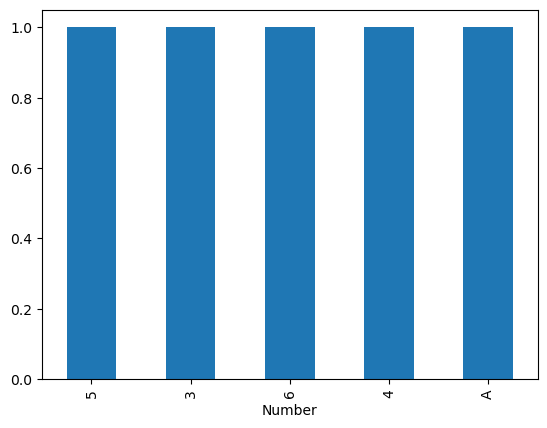

In [16]:
fig = df['Number'].value_counts().plot.bar()

- Extract numerical data

In [17]:
df['number_numerical'] = pd.to_numeric(df['Number'],errors='coerce',downcast='integer')

In [19]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['Number'],np.nan)

In [21]:
df.drop(columns=['Number'])

,Cabin,Class,Ticket,Survived,number_numerical,number_categorical
0,NaN,A1,A/5211,0,5.0,NaN
1,C85,A2,PC 17533,1,3.0,NaN
2,NaN,A3,STON/02.1245,1,6.0,NaN
3,C123,A4,113253,1,4.0,NaN
4,NaN,A5,468462,0,NaN,A


In [24]:
df['Cabin'].unique()

array([nan, 'C85', 'C123'], dtype=object)

In [28]:
df['Cabin_numerical'] =df['Cabin'].str.extract('(\d+)')  #Extract numerical data
df['Cabin_categorical'] = df['Cabin'].str[0] # capture 1st letter

In [37]:
df

,Cabin,Class,Ticket,Number,Survived,number_numerical,number_categorical,class_numerical,classs_categorical,Cabin_numerical,Cabin_categorical
0,NaN,A1,A/5211,5,0,5.0,NaN,NaN,A1,NaN,NaN
1,C85,A2,PC 17533,3,1,3.0,NaN,NaN,A2,85,C
2,NaN,A3,STON/02.1245,6,1,6.0,NaN,NaN,A3,NaN,NaN
3,C123,A4,113253,4,1,4.0,NaN,NaN,A4,123,C
4,NaN,A5,468462,A,0,NaN,A,NaN,A5,NaN,NaN


In [38]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(
    df['ticket_num'],
    errors='coerce',
    downcast='integer'
)

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(
    df['ticket_cat'].str.isdigit(),
    np.nan,
    df['ticket_cat']
)

df


,Cabin,Class,Ticket,Number,Survived,number_numerical,number_categorical,class_numerical,classs_categorical,Cabin_numerical,Cabin_categorical,ticket_num,ticket_cat
0,NaN,A1,A/5211,5,0,5.0,NaN,NaN,A1,NaN,NaN,NaN,A/5211
1,C85,A2,PC 17533,3,1,3.0,NaN,NaN,A2,85,C,17533.0,PC
2,NaN,A3,STON/02.1245,6,1,6.0,NaN,NaN,A3,NaN,NaN,NaN,STON/02.1245
3,C123,A4,113253,4,1,4.0,NaN,NaN,A4,123,C,113253.0,NaN
4,NaN,A5,468462,A,0,NaN,A,NaN,A5,NaN,NaN,468462.0,NaN
